# Initialization

In [1]:
# Data processing
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix,classification_report

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
# Various
from datetime import datetime
import csv

In [2]:
with open('test.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    data = []
    for row in spamreader:
        data.append(''.join(row))

In [3]:
#Processing of data
d = []
import ast
for i in range(0,len(data)):
    x = data[i]
    x = ast.literal_eval(x)
    d.append(x)

In [4]:
df = pd.DataFrame(np.array(d))

In [5]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [207]:
df.iloc[0]

0
f1         -0.0070636994
f2          -0.021031559
f3            0.01198425
f4           -0.08468504
f5           0.008165191
               ...      
f309         0.082952134
f310        -0.009797835
f311        -0.015792351
f312        -0.076450646
content     acquaintance
Name: 2, Length: 313, dtype: object

In [187]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f304,f305,f306,f307,f308,f309,f310,f311,f312,content
count,999,999,999,999,999,999,999,999,999,999,...,999,999,999,999,999,999,999,999,999,999
unique,995,995,995,995,995,995,995,995,995,995,...,995,995,995,995,995,995,995,995,994,9
top,0.0035946427,-0.06233317,-0.0028766212,-0.09204614,0.04823146,0.012077088,-0.01132093,-0.017875532,-0.0048587644,-0.08030733,...,0.11977875,0.0052645686,-0.05049079,0.029357938,-0.029485706,-0.059161615,0.022147877,0.03670913,-0.026194142,acquaintance
freq,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,111


Several dublicate values are present in the dataset. As the amount is insignificant, supposedly, no decrease in model performance might be arisen.

In [15]:
df['content'].unique()

array(['acquaintance', 'apology', 'bye', 'complaints', 'coolness', 'envy',
       'greeting', 'happiness', 'pain', 'thanks'], dtype=object)

In [16]:
print('Total number of data: {}'.format(len(df)))
print('Split by content:')
print(df["content"].value_counts())
nr_contents = len(df["content"].unique())
print("Number of contents: {n}".format(n=nr_contents))

Total number of data: 1110
Split by content:
acquaintance    111
apology         111
bye             111
complaints      111
coolness        111
envy            111
greeting        111
happiness       111
pain            111
thanks          111
Name: content, dtype: int64
Number of contents: 10


## Test-train split

In [6]:
# Renaming, Input -> X, Output -> y
X = df.drop('content', axis = 1)
y = df['content']
# Split into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=df['content'])

### Logistic Regression

In [7]:
model_logp = LogisticRegression(penalty='l2', C = 12.43, max_iter=1000, solver = 'liblinear') # implement L2 regularization into the model 

start_time = datetime.now()
model_logp.fit(X_train, y_train)
end_time = datetime.now()

training_time = (end_time - start_time).total_seconds()

predicted_train = model_logp.predict(X_train)
accuracy_train = accuracy_score(y_train, predicted_train)
print('Accuracy Training data: {:.1%}'.format(accuracy_train))

predicted_test = model_logp.predict(X_test)
accuracy_test = accuracy_score(y_test, predicted_test)
print('Accuracy Test data: {:.1%}'.format(accuracy_test))

print('Training time: {:.1f}s'.format(training_time))

Accuracy Training data: 90.9%
Accuracy Test data: 79.3%
Training time: 0.2s


In [8]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)
    plt.rcParams["figure.figsize"] = (10,10)

NB MODEL
              precision    recall  f1-score   support

acquaintance       0.86      0.97      0.91        33
     apology       0.84      0.91      0.87        34
         bye       0.73      0.73      0.73        33
  complaints       0.73      0.48      0.58        33
    coolness       0.67      0.79      0.72        33
        envy       0.81      0.64      0.71        33
    greeting       0.84      0.79      0.82        34
   happiness       0.79      0.79      0.79        34
        pain       0.81      0.88      0.84        33
      thanks       0.84      0.94      0.89        33

    accuracy                           0.79       333
   macro avg       0.79      0.79      0.79       333
weighted avg       0.79      0.79      0.79       333



C:\Users\islam.iangurazov\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


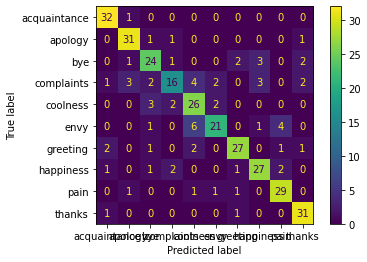

In [160]:
print("NB MODEL")
report(model_logp)

#### Saving the model

In [9]:
final_model = LogisticRegression(penalty='l2', C = 12.43, max_iter=1000, solver = 'liblinear')

In [10]:
final_model.fit(X,y)

LogisticRegression(C=12.43, max_iter=1000, solver='liblinear')

In [11]:
from joblib import dump

In [12]:
dump(final_model, 'final_logr_model.joblib')

['final_logr_model.joblib']

In [237]:
loaded_model = load('final_logr_model.joblib')

In [240]:
datum = pd.DataFrame(X.iloc[545]).T

In [241]:
datum

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312
546,-0.0070497687,-0.012234291,0.009701455,-0.030251859,0.012549877,0.018532803,0.09468126,0.04226994,-0.02255645,-0.102367,...,0.019926911,0.017979482,-0.03466662,-0.029632792,0.07546883,0.009004497,-0.049025867,0.08595334,0.027079761,-0.102316245


In [234]:
tdatum

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312
546,-0.0070497687,-0.012234291,0.009701455,-0.030251859,0.012549877,0.018532803,0.09468126,0.04226994,-0.02255645,-0.102367,...,0.019926911,0.017979482,-0.03466662,-0.029632792,0.07546883,0.009004497,-0.049025867,0.08595334,0.027079761,-0.102316245


In [236]:
loaded_model.predict(tdatum)[0]

'coolness'